In [1]:
import numpy  as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
zip_path = "stock market.zip"

with zipfile.ZipFile(zip_path) as z:
    # list .txt files
    txt_files = [name for name in z.namelist() if name.endswith(".txt")]
    print("Files inside ZIP:", txt_files[:5])
    
    # open first file
    with z.open(txt_files[0]) as f:
        df = pd.read_csv(f)


print(df.head())

Files inside ZIP: ['Data/ETFs/aadr.us.txt', 'Data/ETFs/aaxj.us.txt', 'Data/ETFs/acim.us.txt', 'Data/ETFs/actx.us.txt', 'Data/ETFs/acwf.us.txt']
         Date    Open    High     Low   Close  Volume  OpenInt
0  2010-07-21  24.333  24.333  23.946  23.946   43321        0
1  2010-07-22  24.644  24.644  24.362  24.487   18031        0
2  2010-07-23  24.759  24.759  24.314  24.507    8897        0
3  2010-07-26  24.624  24.624  24.449  24.595   19443        0
4  2010-07-27  24.477  24.517  24.431  24.517    8456        0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1565 non-null   object 
 1   Open     1565 non-null   float64
 2   High     1565 non-null   float64
 3   Low      1565 non-null   float64
 4   Close    1565 non-null   float64
 5   Volume   1565 non-null   int64  
 6   OpenInt  1565 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 85.7+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'], errors ="coerce")

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0
mean,36.014550,36.137120,35.855319,35.987517,6452.979553,0.0
std,6.957747,7.002548,6.878264,6.933814,12047.101114,0.0
min,23.936000,23.946000,23.867000,23.946000,2.000000,0.0
25%,29.829000,29.966000,29.819000,29.862000,529.000000,0.0
50%,36.512000,36.571000,36.322000,36.464000,1559.000000,0.0
75%,38.957000,39.123000,38.787000,38.838000,5993.000000,0.0
max,58.620000,58.720000,57.700000,58.430000,106139.000000,0.0


In [7]:
df.value_counts()

Open    High    Low     Close   Volume  OpenInt
40.133  40.133  40.133  40.133  101     0          3
37.745  37.745  37.745  37.745  101     0          3
38.608  38.608  38.608  38.608  101     0          2
35.938  35.938  35.938  35.938  101     0          2
38.999  38.999  38.999  38.999  101     0          2
                                                  ..
32.370  32.759  32.165  32.165  5201    0          1
        32.400  32.012  32.110  1781    0          1
32.360  32.360  32.350  32.360  2558    0          1
32.350  32.350  32.350  32.350  247     0          1
58.620  58.720  57.310  57.800  31578   0          1
Name: count, Length: 1553, dtype: int64

In [8]:
df.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [9]:
df.duplicated().any()

True

In [10]:
duplicates = df[df.duplicated()]
print(duplicates)


              Open    High     Low   Close  Volume  OpenInt
Date                                                       
2010-08-13  24.401  24.401  24.401  24.401     101        0
2012-01-18  27.874  27.874  27.874  27.874     411        0
2015-03-03  38.452  38.452  38.452  38.452     101        0
2015-03-18  37.745  37.745  37.745  37.745     101        0
2015-03-19  37.745  37.745  37.745  37.745     101        0
2015-04-29  40.133  40.133  40.133  40.133     101        0
2015-04-30  40.133  40.133  40.133  40.133     101        0
2015-06-22  38.787  38.787  38.787  38.787     101        0
2015-07-06  38.608  38.608  38.608  38.608     101        0
2015-07-20  38.999  38.999  38.999  38.999     101        0
2015-09-15  35.938  35.938  35.938  35.938     101        0
2015-10-14  37.356  37.356  37.356  37.356     101        0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1565 entries, 2010-07-21 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     1565 non-null   float64
 1   High     1565 non-null   float64
 2   Low      1565 non-null   float64
 3   Close    1565 non-null   float64
 4   Volume   1565 non-null   int64  
 5   OpenInt  1565 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 85.6 KB


In [12]:
df

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.3330,23.9460,23.9460,43321,0
2010-07-22,24.644,24.6440,24.3620,24.4870,18031,0
2010-07-23,24.759,24.7590,24.3140,24.5070,8897,0
2010-07-26,24.624,24.6240,24.4490,24.5950,19443,0
2010-07-27,24.477,24.5170,24.4310,24.5170,8456,0
...,...,...,...,...,...,...
2017-11-06,57.610,57.7372,57.2285,57.6500,41601,0
2017-11-07,57.290,57.3460,57.1446,57.2850,50935,0
2017-11-08,57.310,57.5500,57.2200,57.4900,71770,0


In [13]:
df = df[~df.duplicated()]


In [14]:
df = df[~df.index.duplicated(keep='first')]


In [15]:
df


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.3330,23.9460,23.9460,43321,0
2010-07-22,24.644,24.6440,24.3620,24.4870,18031,0
2010-07-23,24.759,24.7590,24.3140,24.5070,8897,0
2010-07-26,24.624,24.6240,24.4490,24.5950,19443,0
2010-07-27,24.477,24.5170,24.4310,24.5170,8456,0
...,...,...,...,...,...,...
2017-11-06,57.610,57.7372,57.2285,57.6500,41601,0
2017-11-07,57.290,57.3460,57.1446,57.2850,50935,0
2017-11-08,57.310,57.5500,57.2200,57.4900,71770,0


In [16]:
# Simple Moving Averages (SMA) ---
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

In [17]:
#  Exponential Moving Averages (EMA) ---
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

In [18]:
#  Relative Strength Index (RSI) ---
window_length = 14
delta = df['Close'].diff()

gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

# Use exponential moving average for smoother RSI
avg_gain = pd.Series(gain, index=df.index).ewm(com=window_length-1, adjust=False).mean()
avg_loss = pd.Series(loss, index=df.index).ewm(com=window_length-1, adjust=False).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [19]:
#  Moving Average Convergence Divergence (MACD) 
short_ema = df['Close'].ewm(span=12, adjust=False).mean()
long_ema = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = short_ema - long_ema
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']

In [20]:
#  Bollinger Bands ---
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
df['BB_Std'] = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (df['BB_Std'] * 2)
df['BB_Lower'] = df['BB_Middle'] - (df['BB_Std'] * 2)


In [21]:
# Average True Range (ATR) ---
high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
df['ATR'] = true_range.rolling(window=14).mean()

In [22]:
# --- Clean up ---
df.dropna(inplace=True)

In [23]:
print(df.head())

              Open    High     Low   Close  Volume  OpenInt    SMA_20  \
Date                                                                    
2010-09-30  27.504  27.504  27.340  27.350    5076        0  26.44610   
2010-10-01  27.436  27.436  27.436  27.436    5158        0  26.55610   
2010-10-04  27.874  27.874  27.145  27.194   22136        0  26.64435   
2010-10-05  27.466  27.786  27.466  27.776   71865        0  26.76170   
2010-10-06  27.874  27.874  27.639  27.698    4961        0  26.87175   

              SMA_50     EMA_20     EMA_50        RSI      MACD  MACD_Signal  \
Date                                                                           
2010-09-30  25.36166  26.512235  25.627231  76.522767  0.636070     0.579386   
2010-10-01  25.43146  26.600212  25.698163  77.445052  0.631186     0.589746   
2010-10-04  25.48560  26.656763  25.756824  69.206237  0.600862     0.591969   
2010-10-05  25.55098  26.763357  25.836007  75.857998  0.616683     0.596912   
2010-10-

In [24]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
OpenInt        0
SMA_20         0
SMA_50         0
EMA_20         0
EMA_50         0
RSI            0
MACD           0
MACD_Signal    0
MACD_Hist      0
BB_Middle      0
BB_Std         0
BB_Upper       0
BB_Lower       0
ATR            0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
OpenInt        0
SMA_20         0
SMA_50         0
EMA_20         0
EMA_50         0
RSI            0
MACD           0
MACD_Signal    0
MACD_Hist      0
BB_Middle      0
BB_Std         0
BB_Upper       0
BB_Lower       0
ATR            0
dtype: int64

In [27]:
df.head()

,Open,High,Low,Close,Volume,OpenInt,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,BB_Middle,BB_Std,BB_Upper,BB_Lower,ATR
Date,,,,,,,,,,,,,,,,,,,
2010-09-30,27.504,27.504,27.340,27.350,5076,0,26.44610,25.36166,26.512235,25.627231,76.522767,0.636070,0.579386,0.056684,26.44610,0.727171,27.900442,24.991758,0.209571
2010-10-01,27.436,27.436,27.436,27.436,5158,0,26.55610,25.43146,26.600212,25.698163,77.445052,0.631186,0.589746,0.041440,26.55610,0.700388,27.956877,25.155323,0.180214
2010-10-04,27.874,27.874,27.145,27.194,22136,0,26.64435,25.48560,26.656763,25.756824,69.206237,0.600862,0.591969,0.008892,26.64435,0.660985,27.966321,25.322379,0.224714
2010-10-05,27.466,27.786,27.466,27.776,71865,0,26.76170,25.55098,26.763357,25.836007,75.857998,0.616683,0.596912,0.019771,26.76170,0.641924,28.045549,25.477851,0.258071
2010-10-06,27.874,27.874,27.639,27.698,4961,0,26.87175,25.61304,26.852371,25.909026,73.564500,0.615829,0.600695,0.015133,26.87175,0.601062,28.073874,25.669626,0.271357


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Choose features you want the LSTM to learn from
features = ['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50',
            'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist',
            'BB_Upper', 'BB_Lower', 'ATR']

data = df[features]

In [30]:
#  Normalize the features (scale between 0 and 1) ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Convert back to DataFrame for clarity (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

In [31]:
# Create sequences for LSTM ---
X = []
y = []

window_size = 60  # use past 60 days to predict next day's closing price

for i in range(window_size, len(scaled_df)):
    X.append(scaled_df.iloc[i-window_size:i].values)  # last 60 rows as features
    y.append(scaled_df.iloc[i, 0])  # the 'Close' value at day i

X, y = np.array(X), np.array(y)

print(" Shapes:")
print("X shape:", X.shape)  # (samples, 60, number_of_features)
print("y shape:", y.shape)  # (samples,)

 Shapes:
X shape: (1444, 60, 12)
y shape: (1444,)


In [32]:
# Split 80% for training, 20% for testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1155, 60, 12) (1155,)
Test shape: (289, 60, 12) (289,)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [34]:
# Build LSTM Model ---
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    
    Dense(25, activation='relu'),
    Dense(1) ])

C:\Users\Lalit Karki\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Compile model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,101 (133.21 KB)

 Trainable params: 34,101 (133.21 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the LSTM model 
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - loss: 0.0260 - val_loss: 3.6121e-04
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0018 - val_loss: 5.7143e-04
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0014 - val_loss: 8.8909e-04
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0013 - val_loss: 7.9398e-04
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0011 - val_loss: 6.6481e-04
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 9.3879e-04 - val_loss: 0.0015
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 8.2117e-04 - val_loss: 8.0279e-04
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/20
33/33 ━━━━━━━━━━━

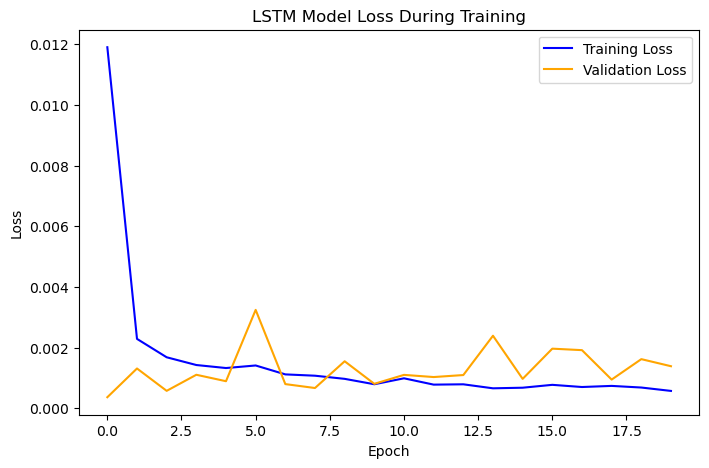

In [38]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Make Predictions
predictions = model.predict(X_test)
print("Predictions shape:", predictions.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
Predictions shape: (289, 1)


In [40]:
from sklearn.metrics import mean_squared_error
import math

In [41]:
# Create an empty array same shape as original scaled data
predicted_scaled = np.zeros((predictions.shape[0], scaled_data.shape[1]))

# Put predicted closing price (first column in our features)
predicted_scaled[:, 0] = predictions[:, 0]

# Inverse transform to original scale
predicted_prices = scaler.inverse_transform(predicted_scaled)[:, 0]

# True closing prices from y_test
true_scaled = np.zeros((y_test.shape[0], scaled_data.shape[1]))
true_scaled[:, 0] = y_test
true_prices = scaler.inverse_transform(true_scaled)[:, 0]

In [42]:
rmse = math.sqrt(mean_squared_error(true_prices, predicted_prices))
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

RMSE (Root Mean Squared Error): 4.96


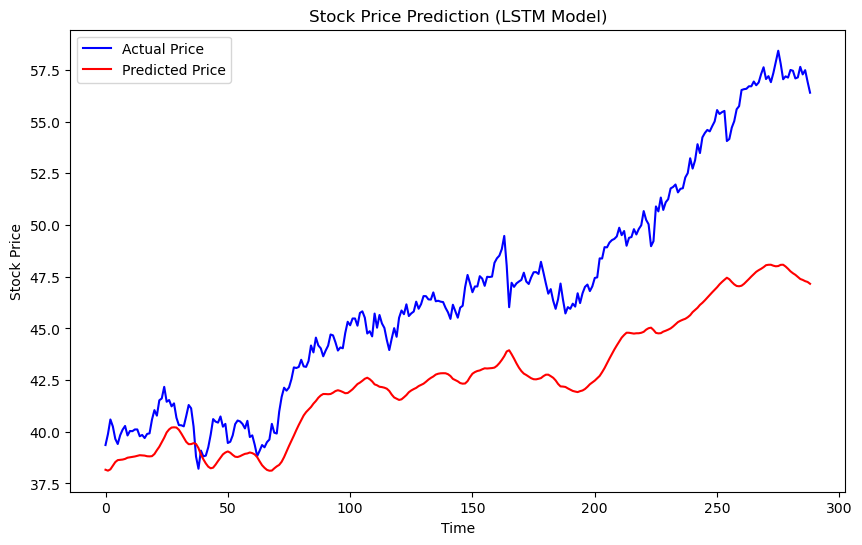

In [43]:
plt.figure(figsize=(10,6))
plt.plot(true_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Stock Price Prediction (LSTM Model)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [44]:
forecast_days = 60

In [45]:
last_sequence = scaled_data[-1:]  # last sequence_length data points

In [46]:
print(model.input_shape)

(None, 60, 12)


In [47]:
print(model.output_shape)


(None, 1)


In [48]:
print(scaled_data.shape)

(1504, 12)


In [49]:
forecast_days = 60
predictions = []

current_sequence = scaled_data[-60:]  # shape: (60, 12)

for _ in range(forecast_days):
    current_sequence_reshaped = current_sequence.reshape((1, 60, 12))
    pred = model.predict(current_sequence_reshaped)[0][0]  # single predicted value

    predictions.append(pred)

    # Create a new timestep array of size 12
    new_timestep = np.zeros((12,))
    new_timestep[0] = pred  # put predicted value in first feature position

    # Append and drop the oldest timestep
    current_sequence = np.append(current_sequence[1:], [new_timestep], axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1

In [50]:
forecast_days = 60
predictions = []

# Take the last 60 timesteps
current_sequence = scaled_data[-60:]  # shape: (60, 12)

for _ in range(forecast_days):
    current_sequence_reshaped = current_sequence.reshape((1, 60, 12))  # model expects (1, 60, 12)
    
    pred = model.predict(current_sequence_reshaped)[0][0]  # single value prediction
    
    predictions.append(pred)

    # Create new timestep of length 12
    new_timestep = np.zeros((12,))
    new_timestep[0] = pred  # predicted feature
    # Optionally: copy other features from last timestep to keep realistic input
    new_timestep[1:] = current_sequence[-1, 1:]

    # Append new timestep and drop oldest timestep
    current_sequence = np.vstack((current_sequence[1:], new_timestep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━

In [51]:
predictions = np.array(predictions)  # shape: (forecast_days,)

# Create array of zeros with shape (forecast_days, 12)
pred_array = np.zeros((predictions.shape[0], scaled_data.shape[1]))  # (forecast_days, 12)

# Put predictions in first column (assuming first feature is target)
pred_array[:, 0] = predictions

# Inverse transform
predictions_inverse = scaler.inverse_transform(pred_array)[:, 0]

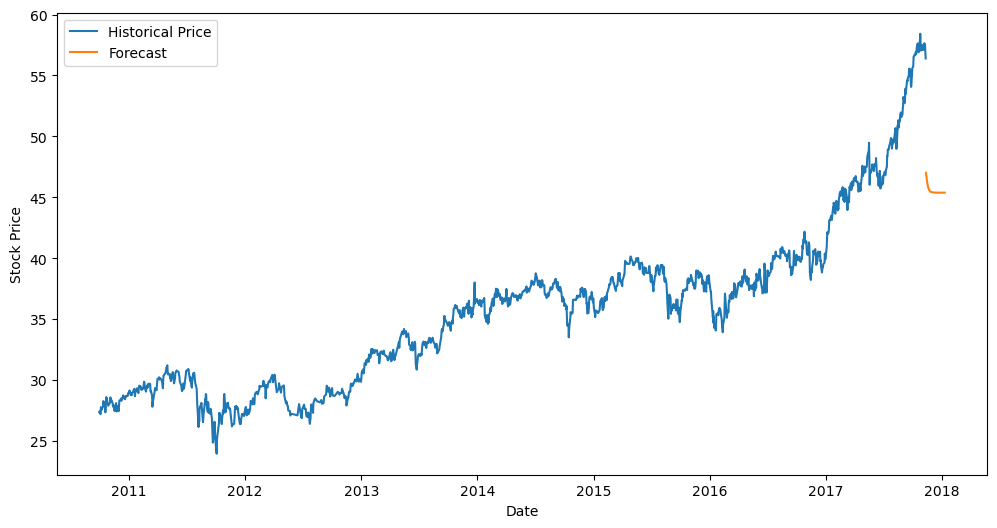

In [52]:
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=len(predictions_inverse))

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label="Historical Price")
plt.plot(future_dates, predictions_inverse, label="Forecast")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [62]:
last_60_days = scaled_df[-60:].values  
future_input = np.copy(last_60_days) 

future_predictions = []  
future_days = 60

In [63]:
for _ in range(future_days):
    input_data = np.reshape(future_input[-60:], (1, 60, scaled_df.shape[1]))
    next_pred_scaled = model.predict(input_data, verbose=0)[0][0]
    
    # Append predicted closing price to future_predictions list
    future_predictions.append(next_pred_scaled)
    
    # Create a placeholder row for all features (we only know predicted Close)
    next_row = np.zeros((scaled_df.shape[1],))
    next_row[0] = next_pred_scaled  # predicted Close
    
    # Append this row to input data for next iteration
    future_input = np.vstack([future_input, next_row])

In [64]:
future_scaled = np.zeros((len(future_predictions), scaled_df.shape[1]))
future_scaled[:, 0] = future_predictions
future_prices = scaler.inverse_transform(future_scaled)[:, 0]

In [65]:
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_prices})
future_df.set_index('Date', inplace=True)

In [66]:
print(future_df.head())

            Predicted_Close
Date                       
2017-11-11        44.708652
2017-11-12        44.164995
2017-11-13        43.304064
2017-11-14        42.281123
2017-11-15        41.163259


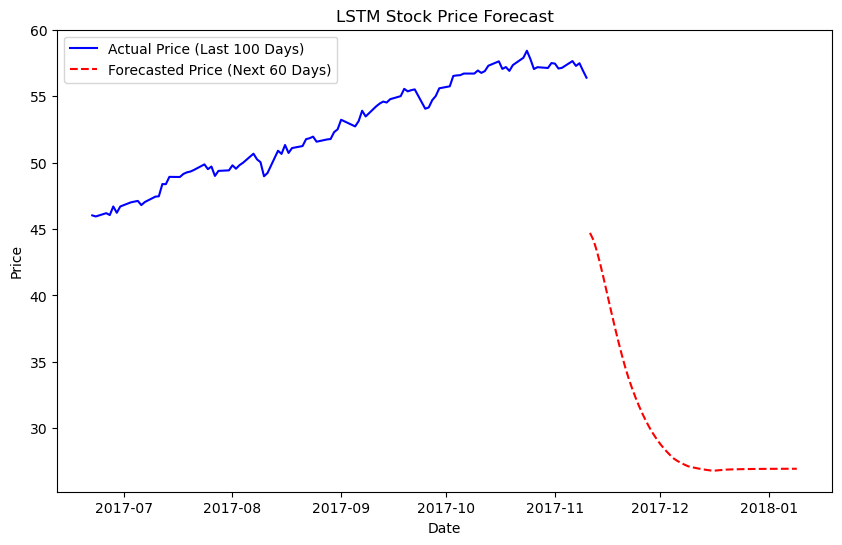

In [68]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'].iloc[-100:], color='blue', label='Actual Price (Last 100 Days)')
plt.plot(future_df['Predicted_Close'], color='red', linestyle='dashed', label='Forecasted Price (Next 60 Days)')
plt.title('LSTM Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
